<a href="https://colab.research.google.com/github/Orlikagan/Portfolio/blob/main/Python_Project_Orli_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analysis for an american store - Stop & Shop
By Orli Kagan



## Using only dictionary and lists


In [8]:
#dataset loading
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import csv 
import numpy as np
import matplotlib.pyplot as plt

In [10]:
active = dict()               #create an empty dictionary for the active usars I want to present, then load the csv file.

with open('/content/drive/MyDrive/Placer/d1.csv', 'r') as file:
    covarage = csv.reader(file, delimiter=',')
    next(covarage)
                                              
    for row in covarage:                       #creating a function, counting all the active users by their device id, if they are above the condition 
        device_id = row[1]                      
        coverage = float(row[2])
        
        if coverage >= 0.75:
            # active day!
            
            active[device_id] = active.get(device_id, 0) + 1         

Presenting active users above 0.75

In [11]:
active

{'1002': 162,
 '1004': 17,
 '1013': 179,
 '1014': 184,
 '1015': 47,
 '1017': 169,
 '1019': 183,
 '1020': 76,
 '1024': 177,
 '1031': 175,
 '1033': 182,
 '1034': 177,
 '1046': 28,
 '1054': 157,
 '1060': 142,
 '1062': 182,
 '1066': 31,
 '1067': 170,
 '1071': 167,
 '1072': 179,
 '1074': 115,
 '1077': 184,
 '1080': 179,
 '1082': 58,
 '1093': 176,
 '1094': 8,
 '1098': 184,
 '1100': 174,
 '1112': 184,
 '1113': 114,
 '1115': 179,
 '1118': 182,
 '1123': 177,
 '1129': 173,
 '1130': 183,
 '1132': 11,
 '1134': 40,
 '1140': 184,
 '1141': 182,
 '1142': 184,
 '1143': 39,
 '1145': 42,
 '1147': 174,
 '1148': 34,
 '1150': 141,
 '1152': 153,
 '1159': 181,
 '1160': 184,
 '1162': 58,
 '1164': 109,
 '1170': 48,
 '1173': 162,
 '1182': 184,
 '1183': 165,
 '1184': 169,
 '1185': 87,
 '1187': 23,
 '1190': 24,
 '1191': 148,
 '1192': 183,
 '1193': 184,
 '1194': 184,
 '1195': 71,
 '1198': 176,
 '1200': 174,
 '1202': 120,
 '1203': 182,
 '1211': 182,
 '1214': 184,
 '1217': 2,
 '1224': 22,
 '1225': 171,
 '1236': 167,


In [12]:
#importing the new Dictionary into csv
with open('user_activity.csv', 'w') as f:
    f.write("%s,%s\n"%('device_id','active_days'))
    for device_id in active.keys():
        f.write("%s,%s\n"%(device_id,active[device_id]))

In [13]:
#number of total active users - 2589 users (all users from original tables are active)
len(active)

2589

##Visualization of users avtivity by days
Histogram Graph

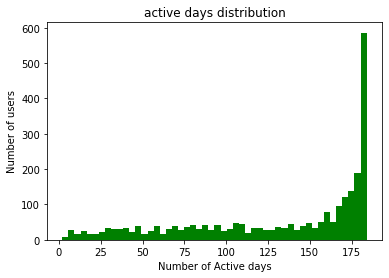

In [14]:
#we see that the biggeset amount of users have been active for about 160-180 days
plt.hist(active.values(), color='g', bins = 50)
plt.title('active days distribution')
plt.xlabel('Number of Active days')
plt.ylabel('Number of users')
plt.show()    

Box Graph

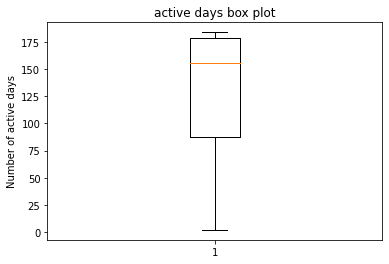

In [15]:
#box plot depicts the median of the active days - 155, number of users that are active >=155 days are equal to the same amount =< 155 days.
# looking at the 25 precentile at the buttom , 25% of the active users are active less than ~80 days, therefore 75% are active more than ~80 days.
# looking at the 75 precentile at the top , 75% of the active users are active less than ~175 days, therefore 25% are active more than ~175 days.
plt.boxplot(active.values())
plt.title('active days box plot')
plt.ylabel('Number of active days')
plt.show() 

##Visitation Patterns Analysis


In [16]:
#importing the libraries.
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates

In [17]:
import plotly.express as px

# Cufflinks is a library that connects the Pandas data frame with Plotly enabling users to create visualizations directly from Pandas.
# https://analyticsindiamag.com/beginners-guide-to-data-visualisation-with-plotly-cufflinks/
import cufflinks as cf
# Use Plotly locally
cf.go_offline()

# Make Plotly work in your Jupyter Notebook
# https://plotly.com/python/getting-started-with-chart-studio/
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Enable plotpy.express in Colab
import plotly.io as pio
pio.renderers.default = 'colab'

In [18]:
#loading the Dataset.
visitations = pd.read_csv('/content/drive/MyDrive/Placer/hashed_visits_Stop_&_Shop_2335_Dixwell_Ave_Hamden_CT_United_States_2019-03-01_2019-09-01.csv')

In [19]:
visitations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765 entries, 0 to 8764
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   device_id         8765 non-null   int64  
 1   visit_id          8765 non-null   object 
 2   venue_id          8765 non-null   object 
 3   visit_start_time  8765 non-null   object 
 4   visit_end_time    8765 non-null   object 
 5   visit_lat         8765 non-null   float64
 6   visit_long        8765 non-null   float64
 7   visit_weight      8765 non-null   float64
 8   user_home_lat     8765 non-null   float64
 9   user_home_long    8765 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 684.9+ KB


##Creating a data farme out of the previous disctionary

In [20]:
active_items = active.items()     #in order to use the previous dictionary in this section
active_list = list(active_items)    #I created a new dataframe based on the results. 

active_days = pd.DataFrame(active_list)

In [21]:
active_days.head()  

,0,1
0,1002,162
1,1004,17
2,1013,179
3,1014,184
4,1015,47


In [22]:
#Adding title to the dataframe, in order for joining the datasets.
active_days.columns =['device_id', 'sum_active_days']

In [23]:
#Converting to the right datatype.
active_days['device_id'] = active_days['device_id'].astype(int)

In [24]:
#Making sure the data type set correctly.
#active_days.info()

Active users considers one that was active for over 90 days

In [25]:
visitation_active= active_days[active_days['sum_active_days'] >= 90]\
.merge(visitations,
      how = 'inner',
      left_on = 'device_id', 
      right_on = 'device_id')\

The column of "visit Weight" calculation is based according to many users sharing similar behavior patterns - under a weight of single device id.

In [26]:
#Step1 : joining the datasets to a new combined Data frame under the filter. 
#Step 2: after the join is set, I found the estimated number of visits to the location by the device_id and the sum of visit weight.

df_sum = visitation_active\
.groupby(['device_id'])\
.agg(sum_visit = ('visit_weight','sum'))\
.sort_values('sum_visit', ascending=False )

The number of visits by active user ,desc order



In [83]:
df_sum.head()

,sum_visit
device_id,
1019,8146.577280
1072,7788.697297
1925,6983.847158
1192,6834.158900
1493,5383.932673


In [28]:
df_sum.describe()    #describing the df_sum dataset, since the sum visit metric is the most important to get to the estimated number of visits to the venue

,sum_visit
count,1932.000000
mean,328.006849
std,617.414685
min,19.627886
25%,63.845820
50%,115.279054
75%,285.453343
max,8146.577280


##Visualization
Histogram Graph
Depicting most of the devices(by device Id) that had a big "weight value of visits", calculated by sum visits column

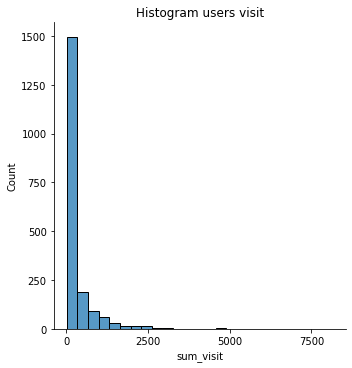

In [29]:
sns.displot(df_sum, x='sum_visit',bins=25).set(title='Histogram users visit')
sns.set(font_scale=1.8)
plt.show()

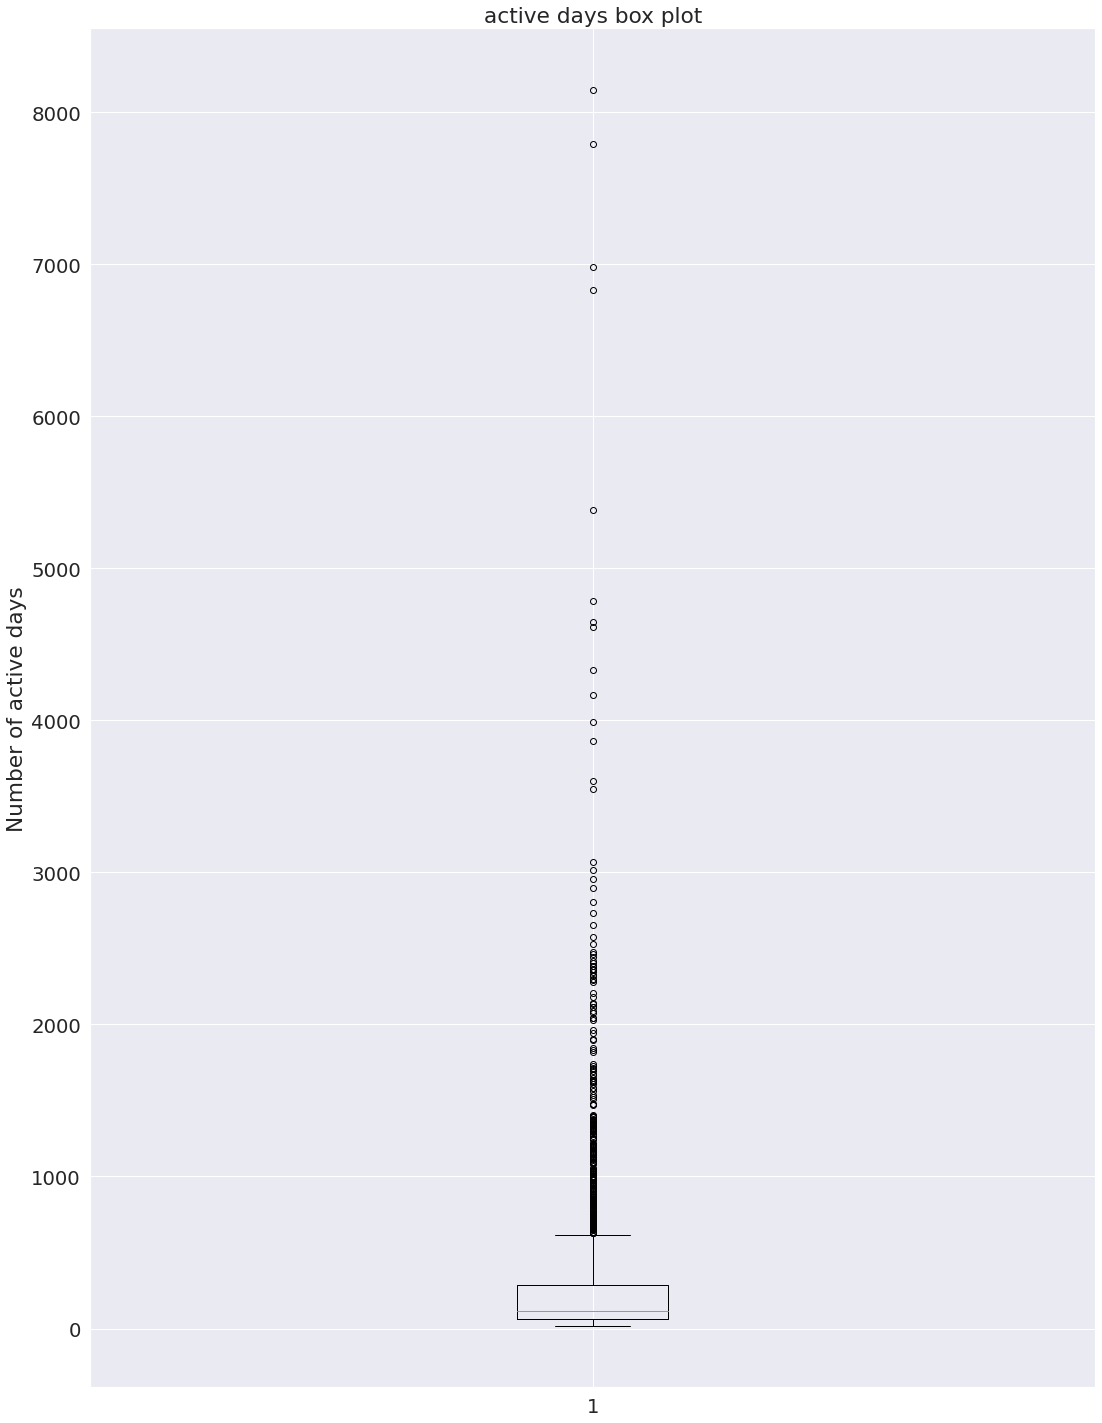

In [30]:
#In this plot we see according to the upper percentile that majority of active users,were active during high numbers of days
plt.figure(figsize=(18,25))
plt.boxplot(df_sum['sum_visit'])
plt.title('active days box plot')
plt.ylabel('Number of active days')
labels = {'petal_width':'Petal Width', 'petal_length':'Petal Length'}
sns.set(font_scale=1.5)
plt.show() 

##Box plot-Sum of Visit
Shows that there are many individual outliers of users that are out far from the most of user population. The whiskers on upper side of the box represent the lowest and highest quartiles of the data. The individual dots beyond the whiskers represent outliers in the data set. Therefore, smaller amount of active users also have small value of sum visit.



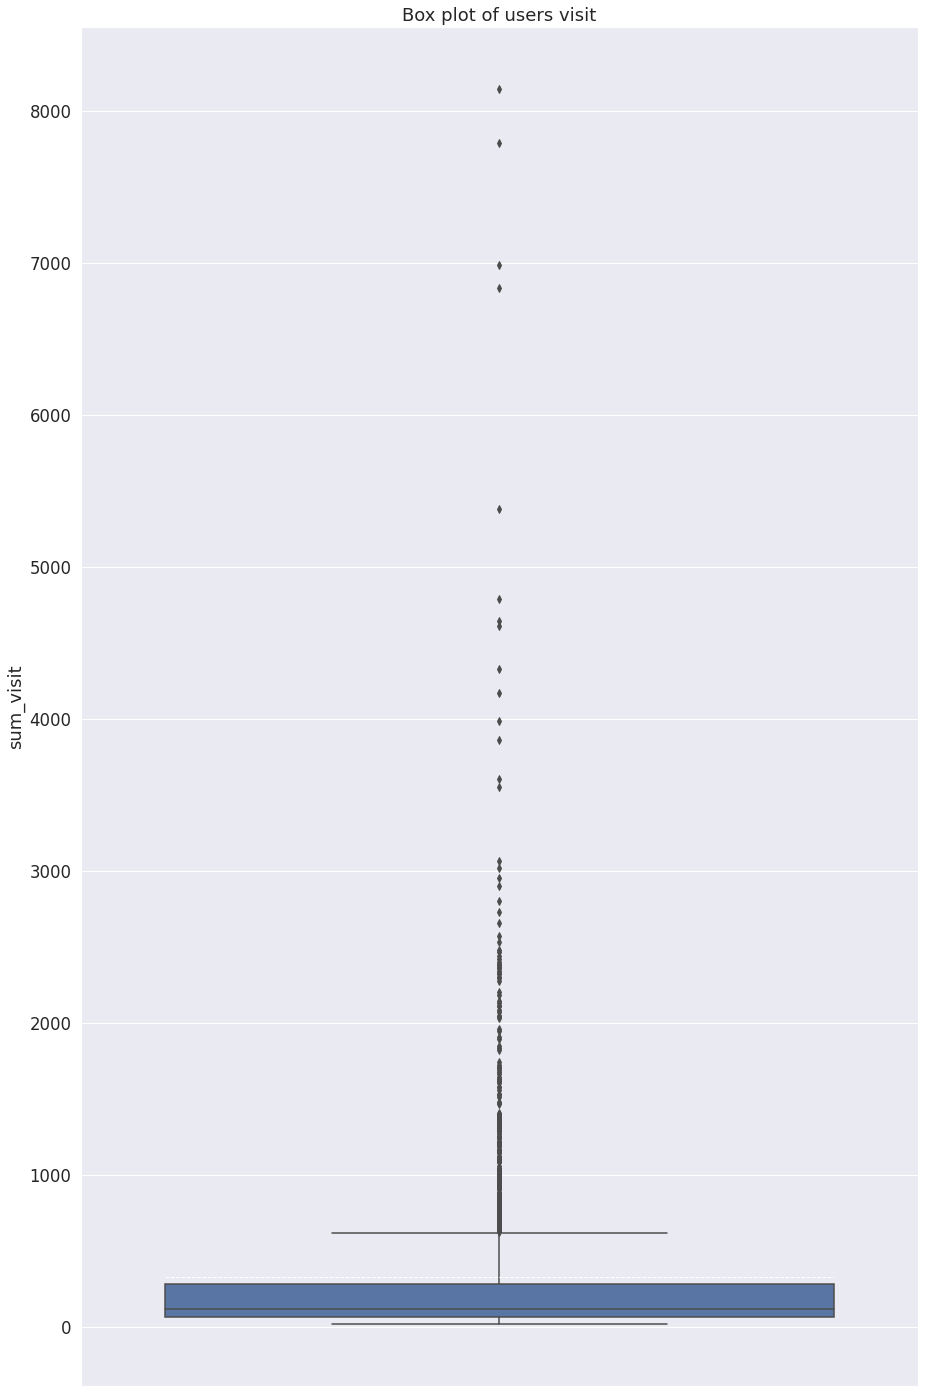

In [31]:
plt.figure(figsize=(15,25))

sns.boxplot(y='sum_visit',
            data=df_sum, 
            showmeans=True,
            meanline=True,
            meanprops={'color':'white'}
            ).set(title='Box plot of users visit')
sns.set(font_scale=5)
plt.show()

In [32]:
#converting to the right datatype
#visitation_active.info()

Avaluating the visitation patterns by the time the user spend at the venue location

In [33]:
visitation_active['visit_start_time'] = pd.to_datetime(visitation_active['visit_start_time'], errors = 'coerce')

In [34]:
visitation_active['visit_end_time'] = pd.to_datetime(visitation_active['visit_end_time'], errors = 'coerce')

Fixing data corruption of user device_id = 1071, in line 230

In [35]:
#This was noticed due to a negative time difference.
#After fixing I make sure it has been corrected
visitation_active[visitation_active['device_id'] == 1071].head(2)

,device_id,sum_active_days,visit_id,venue_id,visit_start_time,visit_end_time,visit_lat,visit_long,visit_weight,user_home_lat,user_home_long
230,1071,167,5c89e0576303be066b25735b,4ceb1df9727f7ce6265b814d,2019-12-03 18:09:00,2019-03-13 00:17:00,41.372185,-72.914024,92.115034,41.363233,-72.941566
231,1071,167,5c8a6f4126e345064670632e,4ceb1df9727f7ce6265b814d,2019-03-13 20:39:00,2019-03-13 23:00:00,41.371948,-72.914055,93.463396,41.364702,-72.941148


In [36]:
#Changing the data in that row for this user
visitation_active.loc[230, 'visit_start_time'] = '2019-03-12 18:09:00'

In [37]:
visitation_active['visit_start_time'] = pd.to_datetime(visitation_active['visit_start_time'], errors = 'coerce')

##Time Series Analysis

Creating two additional columns of time calculations

In [38]:
visitation_active['tot_mins_diff'] = (visitation_active.visit_end_time - visitation_active.visit_start_time) /pd.Timedelta(minutes=1)

In [39]:
visitation_active['tot_h_diff'] = (visitation_active.visit_end_time - visitation_active.visit_start_time) /pd.Timedelta(hours=1)

In [40]:
#calculation of the median values - depicting the amount of time that each active user spent in the venue 
user_time_representative  = visitation_active\
.groupby(['device_id'])\
.agg(representive_active_time_m = ('tot_mins_diff','median'),
     representive_active_time_h = ('tot_h_diff','median'))\
.sort_values('representive_active_time_m', ascending=False )

In [41]:
user_time_representative.head()

,representive_active_time_m,representive_active_time_h
device_id,,
2839,43228.0,720.466667
3142,43220.0,720.333333
1951,41814.0,696.900000
1101,21619.5,360.325000
1753,21305.0,355.083333


In [42]:
#Calculation of the avarage values for avaluation of the avarage time each active user spend
user_time_avg =visitation_active\
.groupby(['device_id'])\
.agg(avg_active_time_m = ('tot_mins_diff','mean'),
     avg_active_time_h = ('tot_h_diff','mean'))\
.sort_values('avg_active_time_m', ascending=False )

In [43]:
user_time_avg.head()

,avg_active_time_m,avg_active_time_h
device_id,,
2839,43228.0,720.466667
3142,43220.0,720.333333
1951,41814.0,696.900000
1101,21619.5,360.325000
1753,21305.0,355.083333


In [44]:
#Created start date by only the date without the time
visitation_active['visit_start_date'] = [x.date() for x in visitation_active['visit_start_time']]

In [45]:
visitation_active['visit_start_date'] = pd.to_datetime(visitation_active['visit_start_date'], errors = 'coerce')

In [46]:
#Counting the number of the active users each day

In [47]:
num_users_day_df = visitation_active.groupby('visit_start_date').agg( num_users_day = ('device_id','count')).sort_values('num_users_day', ascending=False )

In [84]:
num_users_day_df.head()

,num_users_day
visit_start_date,
2019-08-25,82
2019-05-19,77
2019-03-03,69
2019-05-05,68
2019-03-07,67


In [49]:
num_users_day_df.describe()

,num_users_day
count,185.000000
mean,39.772973
std,13.930820
min,1.000000
25%,32.000000
50%,40.000000
75%,47.000000
max,82.000000


##Visualazation- Plot line
Shows the user behavior over time by the amount of active users in that time.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



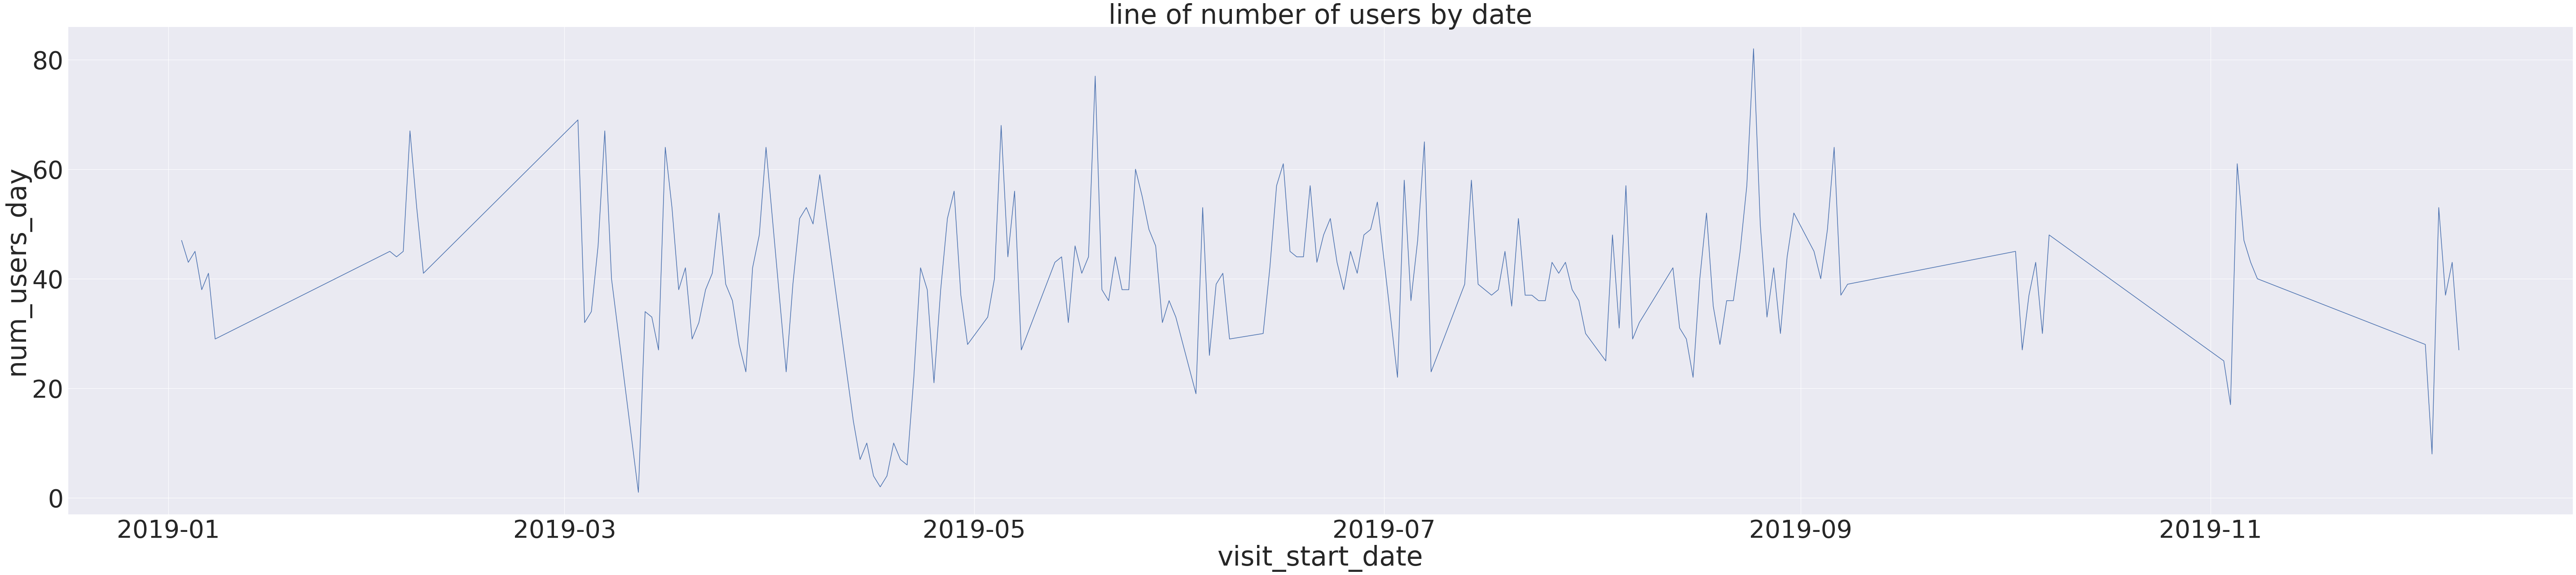

In [50]:
plt.figure(figsize=(100,20))
sns.lineplot('visit_start_date','num_users_day', data = num_users_day_df)\
.set(title='line of number of users by date')
sns.set(font_scale=7)
plt.show()

In [51]:
#represent_time_venue_df

In [52]:
represent_time_venue_df_h = visitation_active.groupby('visit_start_date').agg( representive_time_spent = ('tot_h_diff','median')).sort_values('representive_time_spent', ascending=False )

In [53]:
represent_time_venue_df_h = visitation_active.groupby('visit_start_date').agg( representive_time_spent = ('tot_h_diff','median'), num_users_day = ('device_id','count') ).sort_values('representive_time_spent', ascending=False )
#I have added the count of the number of user that visited on that day - to see if that affected the pick of 6H visit.

In [54]:
represent_time_venue_df_h.head() #Representation by Hours

,representive_time_spent,num_users_day
visit_start_date,,
2019-03-12,6.133333,1
2019-04-17,0.883333,2
2019-04-20,0.700000,7
2019-03-23,0.683333,41
2019-04-16,0.675000,4


##Visualazation
The line shows the most significant time (hours) that user spent at the venue of the shop (around 6H)- this is probably mistake could happened if user forgot his phone at the store

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



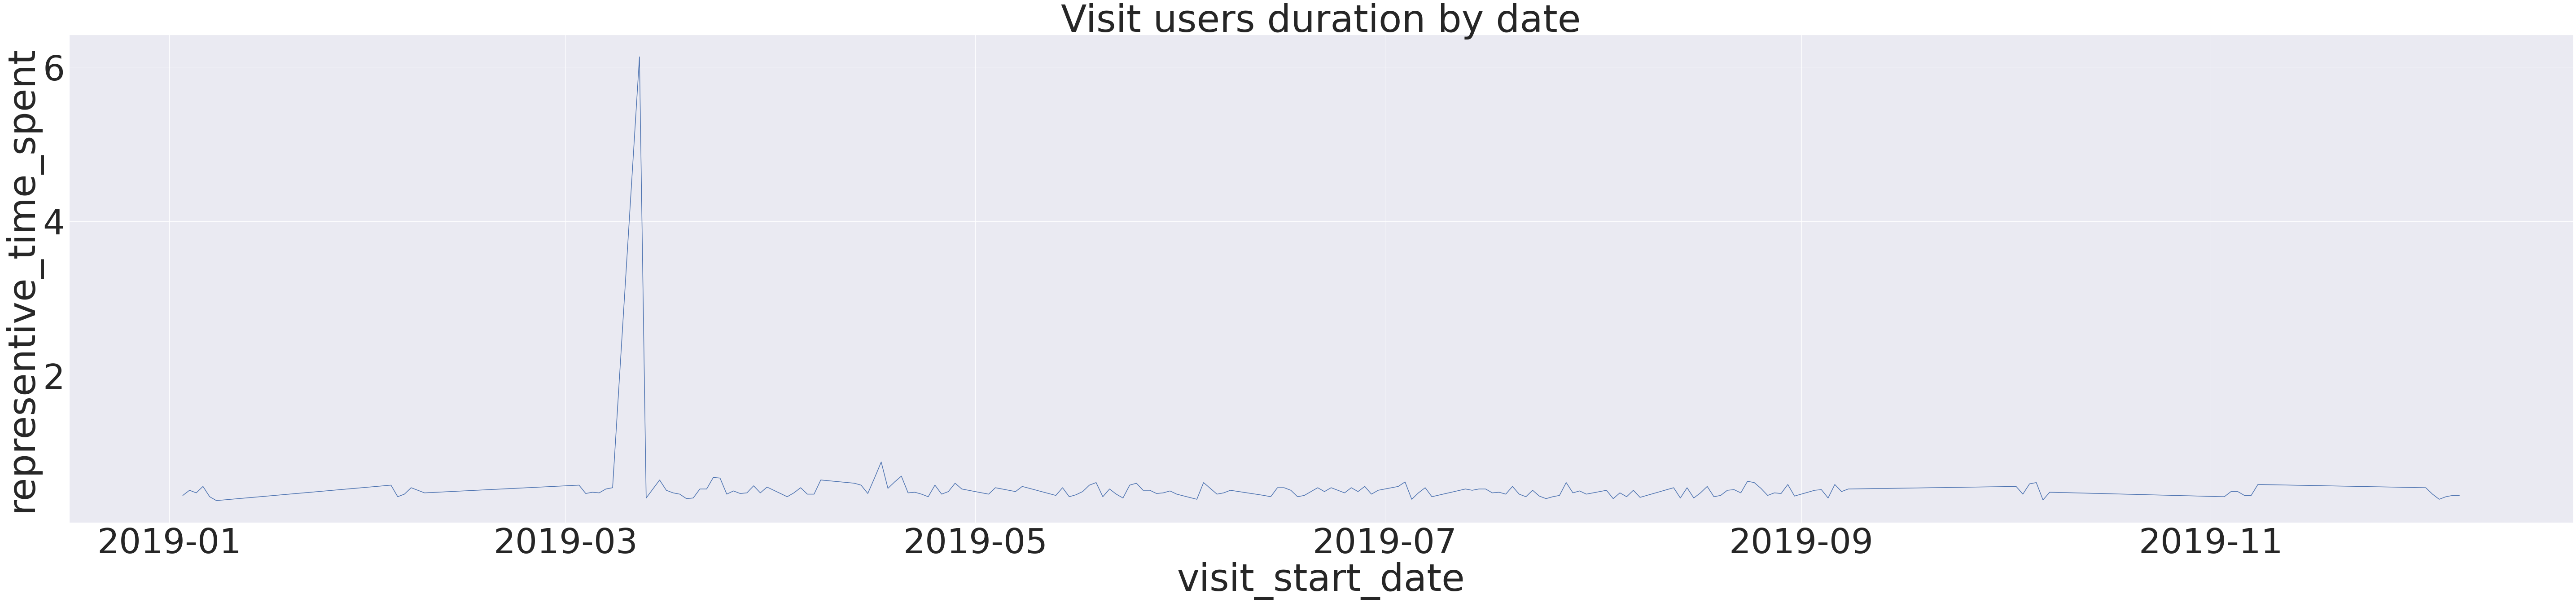

In [55]:
plt.figure(figsize=(100,20))
sns.lineplot('visit_start_date','representive_time_spent', data = represent_time_venue_df_h)\
.set(title='Visit users duration by date' )
sns.set(font_scale=8)
plt.show()

In [56]:
#On what date was the biggest amount of active visitors
weight_visit_sum_bydate = visitation_active.groupby('visit_start_date').agg( sum_visit_date = ('visit_weight','sum')).sort_values('sum_visit_date', ascending=False )

In [57]:
weight_visit_sum_bydate.head()

,sum_visit_date
visit_start_date,
2019-08-25,7167.334840
2019-05-19,6455.341835
2019-03-03,6440.345768
2019-07-07,6294.087107
2019-03-07,6135.056163


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



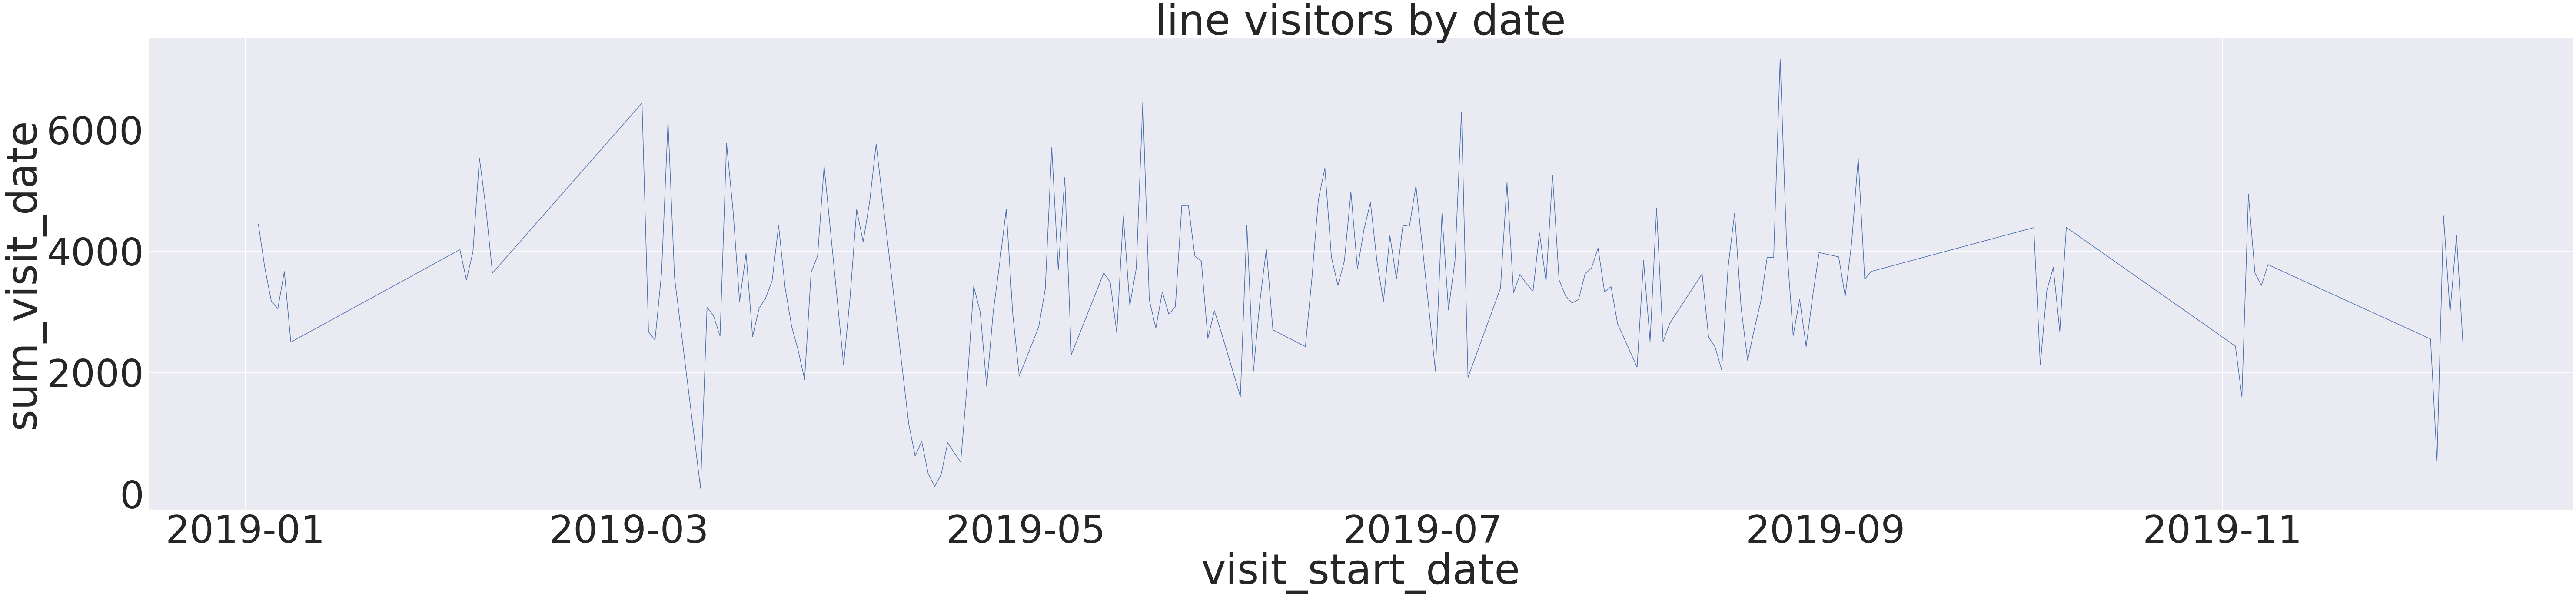

In [58]:
plt.figure(figsize=(100,20))
sns.lineplot('visit_start_date','sum_visit_date', data = weight_visit_sum_bydate)\
.set(title='line visitors by date')
sns.set(font_scale=8)
plt.show()

In [59]:
#Iooking for correlation between amount of visit on a specific day to holiday in USA 

In [60]:
#importing a table of top USA holidays from the web
usa_holidays = pd.read_html('https://donnayoung.org/calendars/us-holiday-dates.htm',
                           match = '2022')

In [61]:
df_usa_holidays = usa_holidays[0]

In [62]:
df_usa_holidays.head(10)

,Holiday,2021,2022,2023,2024,2025,2025.1,2027,2028
0,New Year's Day,1/1,12/31/21*,1/2*,1/1,1/1,1/1,1/1,12/31/27*
1,"Birthday of Martin Luther King, Jr.",1/18,1/17,1/16,1/15,1/20,1/19,1/18,1/17
2,Washington's Birthday,2/15,2/21,2/20,2/19,2/17,2/16,2/15,2/21
3,Memorial Day,5/31,5/30,5/29,5/27,5/26,5/25,5/31,5/29
4,Independence Day,7/5*,7/4,7/4,7/4,7/4,7/3*,7/5*,7/4
5,Labor Day,9/6,9/5,9/4,9/2,9/1,9/7,9/6,9/4
6,Columbus Day,10/11,10/10,10/9,10/14,10/13,10/12,10/11,10/9
7,Veterans Day,11/11,11/11,11/10*,11/11,11/11,11/11,11/11,11/10*
8,Thanksgiving Day,11/25,12/24,11/23,11/28,11/27,11/26,11/25,11/23
9,Christmas Day,12/24*,12/26*,12/25,12/25,12/25,12/25,12/24*,12/25


In [63]:
#changing the row
df_usa_holidays.loc[0, '2021'] = '2019-01-01 '
df_usa_holidays.loc[1, '2021'] = '2019-01-18 '
df_usa_holidays.loc[2, '2021'] = '2019-02-25 '
df_usa_holidays.loc[3, '2021'] = '2019-05-31 '
df_usa_holidays.loc[4, '2021'] = '2019-07-04 '
df_usa_holidays.loc[5, '2021'] = '2019-09-06 '
df_usa_holidays.loc[6, '2021'] = '2019-10-11 '
df_usa_holidays.loc[7, '2021'] = '2019-11-11 '
df_usa_holidays.loc[8, '2021'] = '2019-11-25 '
df_usa_holidays.loc[9, '2021'] = '2019-12-24 '

In [64]:
df_usa_holidays.head(1)

,Holiday,2021,2022,2023,2024,2025,2025.1,2027,2028
0,New Year's Day,2019-01-01,12/31/21*,1/2*,1/1,1/1,1/1,1/1,12/31/27*


In [65]:
df_usa_holidays.drop(['2022', '2023','2024','2025','2025.1','2027','2028'], axis=1).head(1)
df_holidays = df_usa_holidays.drop(['2022', '2023','2024','2025','2025.1','2027','2028'], axis=1)

In [66]:
#Matching column names
df_holidays = df_holidays.rename({'2021':'visit_start_date'}, axis=1)

In [67]:
df_holidays['visit_start_date'] = pd.to_datetime(df_holidays['visit_start_date'], errors = 'coerce')

In [68]:
weight_visit_sum_bydate\
.merge(df_holidays,
      how = 'inner',
      left_on = 'visit_start_date', 
      right_on = 'visit_start_date')

,visit_start_date,sum_visit_date,Holiday
0,2019-09-06,5536.397503,Labor Day
1,2019-07-04,4619.255471,Independence Day
2,2019-05-31,2685.025474,Memorial Day


In [69]:
#df_holidays.info()

##Analysis of Loyal Customer


By the distance of the customer's home location to the venue 


In [70]:
#importing the librarie for coordination calculation.

In [71]:
!pip install haversine

In [72]:
import haversine as hs

In [88]:
column_list_loc = ['device_id','visit_lat',	'visit_long','user_home_lat',	'user_home_long','visit_weight']  #cleaner dataset creation for the needed columns

df_calc = visitation_active[column_list_loc]

In [89]:
#Function calculating the distance from user home to the venue
loc_venue=(41.3723654,-72.9141964)
df_calc['distance_from_home'] = df_calc.apply(lambda row: hs.haversine(loc_venue, (row.user_home_lat, row.user_home_long)), axis=1)

In [90]:
#creating a function to find the distance from actual user location to the venue
loc_venue=(41.3723654,-72.9141964)
df_calc['distance_from_venue'] = df_calc.apply(lambda row: hs.haversine(loc_venue, (row.visit_lat, row.visit_long)), axis=1)

In [91]:
df_calc.head()

,device_id,visit_lat,visit_long,user_home_lat,user_home_long,visit_weight,distance_from_home,distance_from_venue
0,1002,41.372665,-72.914345,41.261586,-72.941100,57.709077,12.521317,0.035583
1,1002,41.372025,-72.914780,41.262918,-72.943464,63.175127,12.412983,0.061687
2,1013,41.372345,-72.914330,41.349256,-72.917082,134.745862,2.580899,0.011339
3,1013,41.372192,-72.914665,41.349938,-72.919179,130.592173,2.528240,0.043595
4,1013,41.372215,-72.914482,41.348251,-72.918426,131.286551,2.704568,0.029105


In [92]:
#Mergin both of the calculation fields on the sum visits 
df_q3=df_calc\
.merge(df_sum,
      how = 'inner',
      left_on = 'device_id', 
      right_on = 'device_id')

In [93]:
df_q3.head()

,device_id,visit_lat,visit_long,user_home_lat,user_home_long,visit_weight,distance_from_home,distance_from_venue,sum_visit
0,1002,41.372665,-72.914345,41.261586,-72.941100,57.709077,12.521317,0.035583,120.884204
1,1002,41.372025,-72.914780,41.262918,-72.943464,63.175127,12.412983,0.061687,120.884204
2,1013,41.372345,-72.914330,41.349256,-72.917082,134.745862,2.580899,0.011339,2343.294267
3,1013,41.372192,-72.914665,41.349938,-72.919179,130.592173,2.528240,0.043595,2343.294267
4,1013,41.372215,-72.914482,41.348251,-72.918426,131.286551,2.704568,0.029105,2343.294267


In [94]:
#df_q3.describe()

In [95]:
device_visits = df_q3.groupby(['device_id','sum_visit'])\
.agg(count_device = ('device_id','count'))\
.sort_values('sum_visit', ascending=False )

In [96]:
device_visits.head() #looking to see who are the active users , by their device count .

,,count_device
device_id,sum_visit,
1019,8146.577280,88
1072,7788.697297,91
1925,6983.847158,49
1192,6834.158900,49
1493,5383.932673,58


In [97]:
device_visits.describe() 

,count_device
count,1932.000000
mean,3.808489
std,6.450350
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,91.000000


In [98]:
#Presentation of the 2 important metrics: the distanse from home to the venue shop + the avg distance of the user from the venue shop,
#across the unique user device identifier and sum of visit.
avg_dis_home_df = df_q3.groupby(['device_id','sum_visit'])\
.agg(venue_dis_home = ('distance_from_home', 'mean'),
     avg_dis_venue = ('distance_from_venue', 'mean'))\
.sort_values('sum_visit', ascending=False)

In [99]:
avg_dis_home_df.head()

,,venue_dis_home,avg_dis_venue
device_id,sum_visit,,
1019,8146.577280,3.027400,0.042223
1072,7788.697297,2.403201,0.047978
1925,6983.847158,4.721518,0.047727
1192,6834.158900,1.758946,0.030391
1493,5383.932673,1.973855,0.053534


In [100]:
avg_dis_home_df.describe() #this is to help understand the distance affect on the amount of visits

,venue_dis_home,avg_dis_venue
count,1932.000000,1932.000000
mean,79.444429,0.046673
std,339.131189,0.016123
min,0.444159,0.002290
25%,3.676478,0.035925
50%,7.090102,0.045927
75%,17.705617,0.056986
max,4054.036922,0.112930


#Visulazation -
This plot depicting majority of users, that have small distance from home to venue.

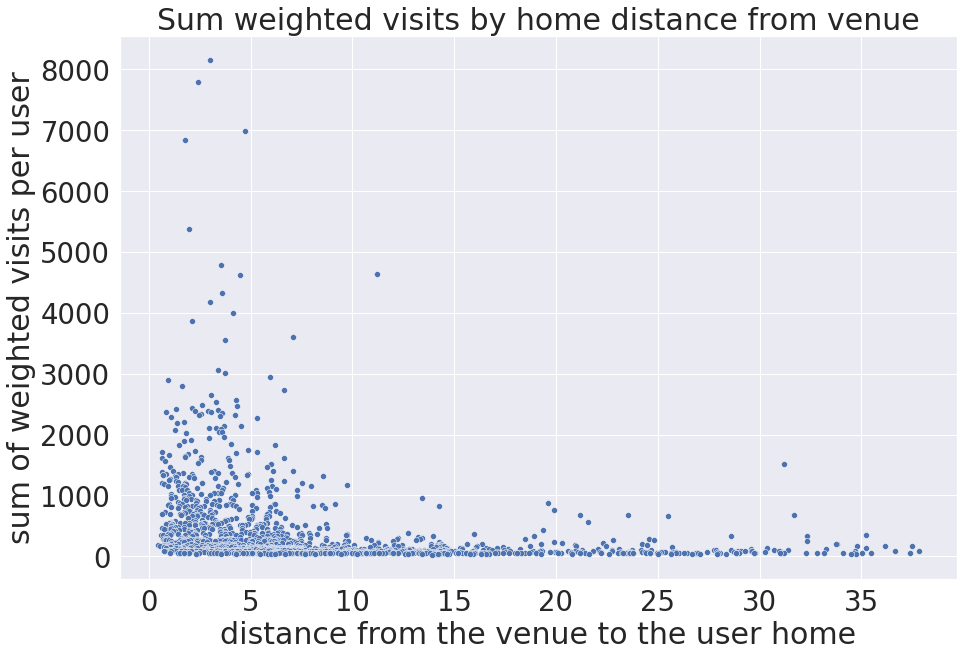

In [109]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='venue_dis_home',
                y='sum_visit',
                data=avg_dis_home_df
                )\
.set(title='Sum weighted visits by home distance from venue', 
     xlabel='distance from the venue to the user home', 
     ylabel='sum of weighted visits per user')
sns.set(font_scale=1);

In [110]:
avg_dis_home_df = avg_dis_home_df.reset_index()

In [111]:
''' changing the box plot for better representation'''
# IQR
Q1 = np.percentile(avg_dis_home_df['venue_dis_home'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(avg_dis_home_df['venue_dis_home'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ",avg_dis_home_df.shape)
 
# Upper bound
upper = np.where(avg_dis_home_df['venue_dis_home'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(avg_dis_home_df['venue_dis_home'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
avg_dis_home_df.drop(upper[0], inplace = True)
avg_dis_home_df.drop(lower[0], inplace = True)

Old Shape:  (1616, 5)


Box plot
Loyal users are the one that scattered around the top 75th percentile. 
The upper part of the tail -outlier, showes that small amount of users have longer home distance.

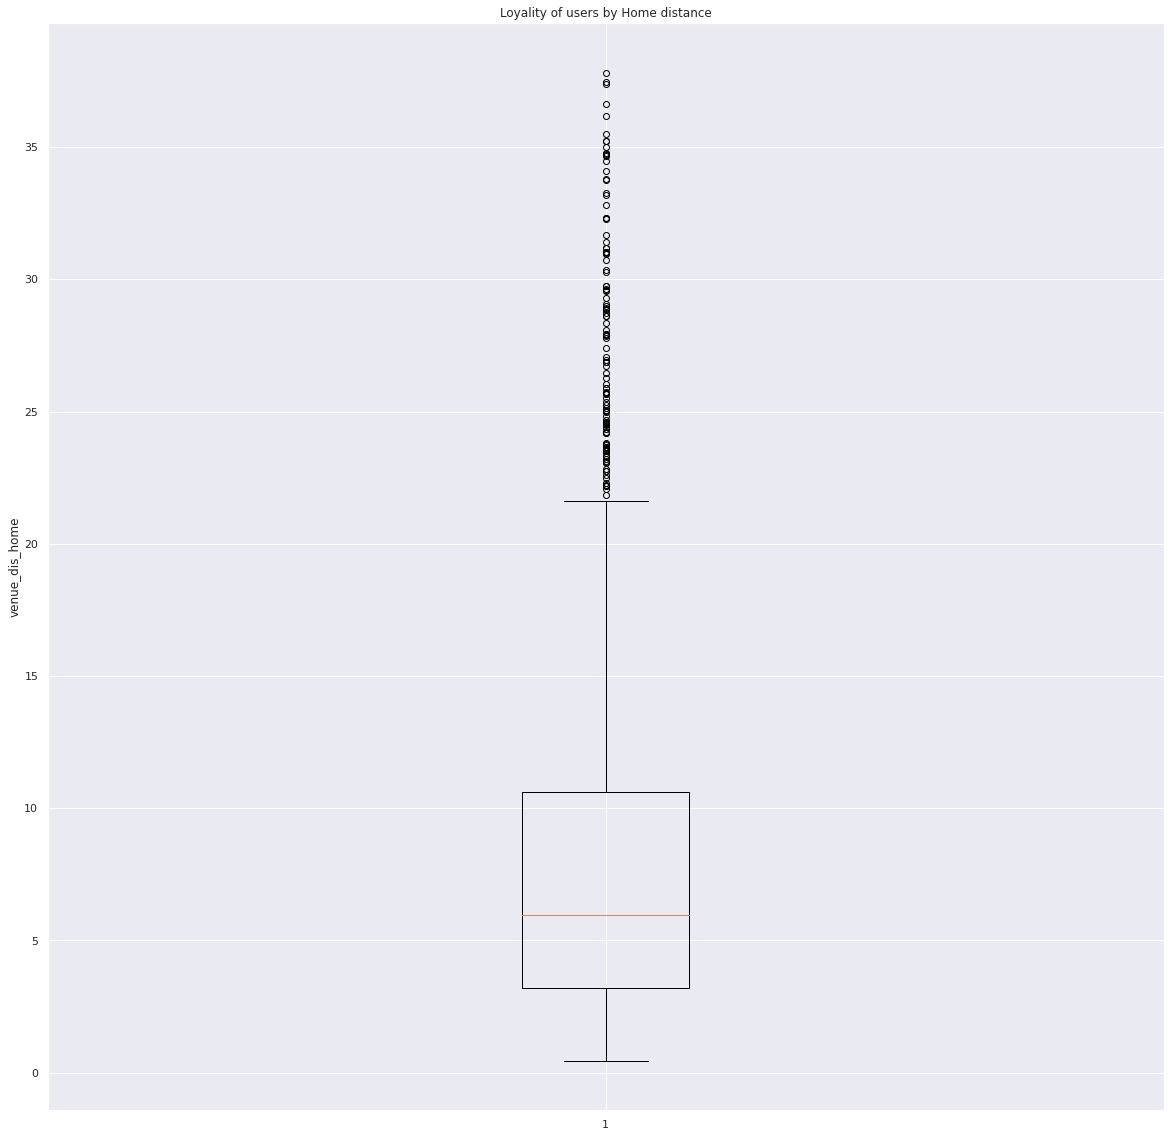

In [104]:
plt.figure(figsize=(20,20))
plt.boxplot(avg_dis_home_df['venue_dis_home'])
plt.title('Loyality of users by Home distance')
plt.ylabel('venue_dis_home')
sns.set(font_scale=2.5)
plt.show() 

According to statistical description of the data.
I decided that loyal users have "sum visit" value of = ~1618.765522, this calculation is helping to evaluate the number of visits and oftency it takes over time, to be concidered as loyal- repeating user.

In [105]:
df_q3.describe()

,device_id,visit_lat,visit_long,user_home_lat,user_home_long,visit_weight,distance_from_home,distance_from_venue,sum_visit
count,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000
mean,2012.232400,41.372530,-72.914449,41.268831,-73.136772,86.125201,34.441739,0.044565,1315.803646
std,649.515604,0.000275,0.000294,1.090791,2.212434,29.865664,225.912416,0.018108,1662.112940
min,1000.000000,41.371681,-72.915543,26.153133,-118.732731,19.627886,0.401151,0.000963,19.627886
25%,1434.000000,41.372322,-72.914642,41.344757,-72.941838,59.843131,2.041467,0.031662,251.115007
50%,1977.000000,41.372566,-72.914436,41.365621,-72.920977,87.479411,3.666193,0.043047,792.418208
75%,2581.000000,41.372734,-72.914268,41.392109,-72.901110,99.676487,6.979527,0.056948,1618.765522
max,3332.000000,41.373261,-72.913162,46.843786,-68.543798,391.667556,4054.036922,0.112930,8146.577280
